# Introduction to Deep Learning, HW 1 Template
This document gives a suggested outline for the coding assignment.  Please see the assignment pdf for a more complete description of the assignment.

**[Duke Community Standard](http://integrity.duke.edu/standard.html): By typing your name below, you are certifying that you have adhered to the Duke Community Standard in completing this assignment.**

Name: Xiaoyu Li

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
% matplotlib inline

## Problem 2: Algorithmic Implementation of a Multi-Class Logistic Regression without Tensorflow (30 Points)

Succintly, for this problem we have an input image that we have vectorized to have $p=784$ features, and the output space is $C=10$ dimensional.  To get the full details on logistic regression, please visit the example codes and and the lectures.  Succinctly, the multiclass logistic regression model is as follows:

$$\mathbf{\gamma}=\mathbf{W}\mathbf{x}+\mathbf{b},\quad \mathbf{W}\in\mathbb{R}^{C\times p},\quad \mathbf{b}\in\mathbb{R}^{C}$$
$$ p(y=j)=\text{softmax}(\mathbf{\gamma})_j$$
$$\ell(y,\gamma)=\sum_{j=1}^C1_{(y=j)}\log(\text{softmax}(\mathbf{\gamma})_j)$$
or, if $\mathbf{r}$ is a one-hot encoding of $y$, then
$$\ell(r,\gamma)=\mathbf{r}\cdot \log(\text{softmax}(\mathbf{\gamma}))$$
We want to implement this model in more basic codes and learn it to build a better understanding of what's going on before moving to using deep learning toolkits.

In is permissable in the context of this problem to use the MNIST dataset and minibatcher from Tensorflow, which should reduce the amount of bespoke coding that you have to do.

Note that this function is depreciated, but it will work for now.

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Visualizing the data to make sure that its understood:

Training image data:  (55000, 784)
Testing image data:  (10000, 784)
28 x 28 =  784

Train image 1 is labelled one-hot as [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


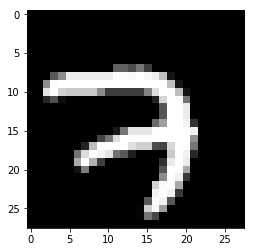

In [7]:
# Dataset statistics# Datas 
print('Training image data: ', mnist.train.images.shape)
print('Testing image data: ', mnist.test.images.shape)
print('28 x 28 = ', 28*28)

# Example image
print('\nTrain image 1 is labelled one-hot as {0}'.format(mnist.train.labels[0,:]))
image = np.reshape(mnist.train.images[0,:],[28,28])
plt.imshow(image, cmap='gray')

You can pull a new data example from MNIST by the following:

Note that the digit will change each time you run this because it is randomly sampling.


Train image 1 is labelled one-hot as [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


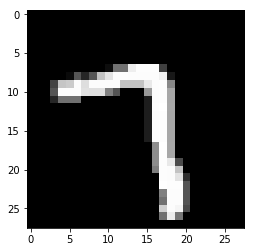

In [8]:
current_data=mnist.train.next_batch(1)
# Example image

print('\nTrain image 1 is labelled one-hot as {0}'.format(current_data[1]))
image = np.reshape(current_data[0],[28,28])
plt.imshow(image, cmap='gray')

Below are the functions that you need to define to make this work.

In [9]:
def lr_gradient(current_parameters, data_minibatch):
    # calculate the gradient on the data
    W_grad = np.zeros((10, 784))
    b_grad = np.zeros((10, ))
    W = current_parameters[0]
    b = current_parameters[1]
    x = data_minibatch[0]
    r = data_minibatch[1]
    N = x.shape[0]
    for i in range(N):
        gamma = np.matmul(W, x[i]) + b
        l_grad_gamma = softmax(gamma) - r[i]
        W_grad += np.matmul(l_grad_gamma.reshape(1, -1).T, x[i].reshape(1, -1))
        b_grad += l_grad_gamma
    W_grad /= 1.0 * N
    b_grad /= 1.0 * N
    return W_grad, b_grad

In [10]:
def lr_loss(current_parameters, data_minibatch):
    # calculate the loss
    W = current_parameters[0]
    b = current_parameters[1]
    x = data_minibatch[0]
    r = data_minibatch[1]
    N = x.shape[0]
    avg_loss = 0.0
    for i in range(N):
        gamma = np.matmul(W, x[i]) + b
        curr_loss = np.matmul(r[i], np.log(softmax(gamma)))
        avg_loss -= curr_loss
    return avg_loss / (1.0 * N)

In [29]:
def softmax(gamma):
    """Compute softmax values"""
    numerator = np.exp(gamma)
    denominator = sum(numerator)
    return numerator / (1.0 * denominator)

Run the stochastic gradient descent optimization loop.  Note that you need to fill in the values to make this work well.

In [40]:
minibatch_size = 100
data_minibatch = mnist.train.next_batch(minibatch_size)

max_iterations=100 # choose the max number of iterations
step_size=0.1 # choose your step size
W = np.random.rand(10, 784)  # choose your starting parameters (connection weights)
b = np.random.rand(10, )  # choose your starting parameters (biases)
training_loss_history=[]
for iter in range(0,max_iterations):
    # current_data=mnist.train.next_batch(1)
    # note you need to change this to your preferred data format.
    current_parameters = [W, b]
    W_grad,b_grad=lr_gradient(current_parameters,data_minibatch)    
    training_loss_history.append(\
        lr_loss(current_parameters,data_minibatch))   
    W=W-step_size*W_grad
    b=b-step_size*b_grad

It can be a helpful diagnostic tool to visualize the learning curve:

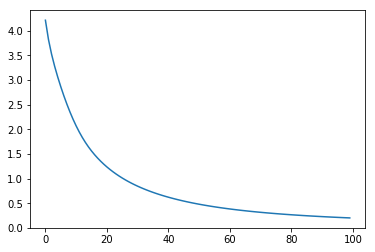

In [41]:
plt.plot(training_loss_history)

Calculate both your training loss and accuracy and your validation loss and accuracy

In [ ]:
# Fill in code here.


## Problem 3: Algorithmic Implementation of a Multi-Class Logistic Regression with Tensorflow (30 Points)
As above, but now you are allowed to use tensorflow to perform model learning.

### (a)	Set up a logistic regression network, and learn it on MNIST using stochastic gradient descent.

In [ ]:
# Modeling Definition

In [ ]:
# Learning

In [ ]:
# Evaluation

### (b)	Set up an MLP with a single hidden layer (you can choose the number of hidden nodes) and learn it on MNIST using stochastic gradient descent.

In [ ]:
# Modeling Definition

In [ ]:
# Learning

In [ ]:
# Evaluation

### (c)	Set up an MLP with two hidden layers (i.e. lecture 2, slide 55)

In [ ]:
# Modeling Definition

In [ ]:
# Learning

In [1]:
# Evaluation

## Problem 4: Performance Comparison (20 points)

### (a)	Did your implementations and Tensorflow’s implementations from problems 2 and 3 perform the same?

Response and evidence.

### (b)	What is the validation accuracy from the multi-class logistic regression?

Response and evidence.

### (c)	What is the validation accuracy from the multi-class MLP with a single hidden layer?  If you change the number of nodes in the hidden layer, how susceptible is the hold out performance?

Response and evidence.

### (d)	What is the validation accuracy from the multi-class MLP with two hidden layer?  If you change the number of nodes in the hidden layers, how susceptible is the hold out performance?

Response and evidence.

### (e)	Do you match my reported accuracies (lecture 2, slide 58)?

Response and evidence.